In [46]:
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

# Import necessary packages
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

reference: 
YT: https://youtu.be/0yaYwDyBxFA?si=Z4F6CIRNOkZGv4mK
Notebook: /Users/omkar/Desktop/ExcelR Download/DS Batch Nov 3pm to 5pm/Association_Rules , Apriori Algorithm(25.3.25).

In [30]:
# Load Data Set
df=pd.read_excel("Online retail.xlsx")
df

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [31]:
# Dataset Shape
df.shape

(7500, 1)

In [32]:
# Data Types & Null Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                           --------------  ----- 
 0   shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil  7500 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [33]:
df.columns

Index(['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil'], dtype='object')

In [34]:
df.columns= ["Items"] # setting column name of df to "Items".

In [35]:
df.sample(30) # random sample of rows or columns from a DataFrame

,Items
4833,"escalope,low fat yogurt"
6494,french fries
6655,champagne
7230,"vegetables mix,cookies,mushroom cream sauce,ho..."
643,muffins
4097,clothes accessories
5102,"frozen vegetables,mineral water,energy bar,eggs"
1095,"french fries,frozen smoothie"
783,"spaghetti,mineral water,milk"
2606,escalope


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Items   7500 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


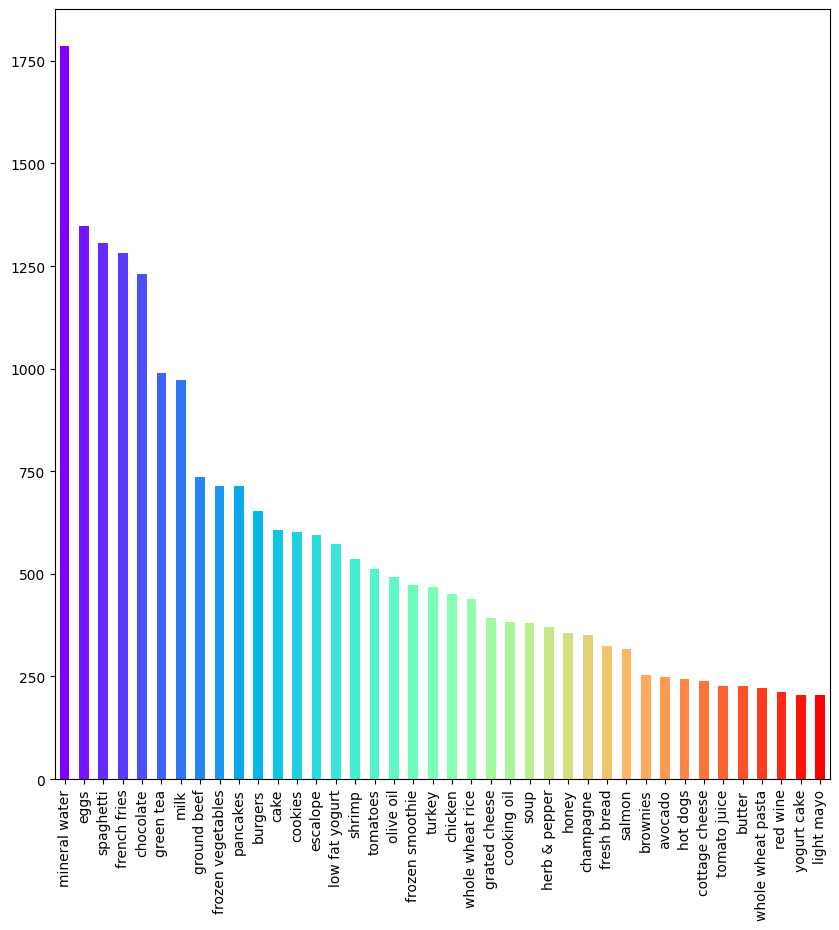

In [51]:
import itertools

all_items = list(itertools.chain.from_iterable(df["Items"]))

item_freq = pd.Series(all_items).value_counts().head(40)

plt.figure(figsize=(10,10))
colors = plt.cm.rainbow(np.linspace(0,1,len(item_freq)))
item_freq.plot(kind='bar', color=colors)
plt.show()

# The taller the bar → more frequently purchased

In [37]:
# Check missing values per column
df.isnull().sum()

,0
Items,0


In [38]:
# Count duplicate rows
df.duplicated().sum()

np.int64(2325)

Apriori works on transactions, not rows. Keeping Duplicates won't affect result

In [39]:
df.describe()

,Items
count,7500
unique,5175
top,cookies
freq,223


In [40]:
! pip install mlxtend
# Python library that provides extra machine learning utilities that are not directly included in scikit-learn.

In [41]:
unique_combination=df.agg({"Items":list})
unique_combination

,Items
0,"[b, u, r, g, e, r, s, ,, m, e, a, t, b, a, l, ..."
1,"[c, h, u, t, n, e, y]"
2,"[t, u, r, k, e, y, ,, a, v, o, c, a, d, o]"
3,"[m, i, n, e, r, a, l, , w, a, t, e, r, ,, m, ..."
4,"[l, o, w, , f, a, t, , y, o, g, u, r, t]"
...,...
7495,"[b, u, t, t, e, r, ,, l, i, g, h, t, , m, a, ..."
7496,"[b, u, r, g, e, r, s, ,, f, r, o, z, e, n, , ..."
7497,"[c, h, i, c, k, e, n]"
7498,"[e, s, c, a, l, o, p, e, ,, g, r, e, e, n, , ..."


In [42]:
# "OR" ## df["Items"] = df["Items"].str.split(",")

Earlier Each row was a Indiviual string after applying agg(list()) it break string to individual char.
— because strings are iterable in Python.

In [43]:
df["Items"] = df["Items"].apply(
    lambda x: [item.strip() for item in str(x).split(",")]
)

print(df.head(10))
# convert string into list of items

                                               Items
0                         [burgers, meatballs, eggs]
1                                          [chutney]
2                                  [turkey, avocado]
3  [mineral water, milk, energy bar, whole wheat ...
4                                   [low fat yogurt]
5                  [whole wheat pasta, french fries]
6                       [soup, light cream, shallot]
7          [frozen vegetables, spaghetti, green tea]
8                                     [french fries]
9                                   [eggs, pet food]


In [44]:
transaction = df["Items"].tolist() # .tolist() converts the Series into a plain Python list
transaction

[['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spaghetti',
  'mineral water',
  'black tea',
  'salmon',
  'eggs',
  'chicken',
  'extra dark chocolate'],
 ['meatballs', 'milk', 'honey', 'french fries', 'protein bar'],
 ['red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'],
 ['rice', 'sparkling water'],
 ['spaghetti', 'mineral water', 'ham', 'body spray',

In [45]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [53]:
T = TransactionEncoder()
T

TransactionEncoder()

In [54]:
T_array = T.fit(transaction).transform(transaction)
T_array

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [56]:
df_encoded = pd.DataFrame(T_array, columns=T.columns_)
df_encoded

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
df_encoded_int = df_encoded.astype(int)
df_encoded_int

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


working pipeline:

Raw Items → Boolean encoded → Apriori → Top rules → Frequent items bar chart

In [60]:
frequent_itemsets = apriori(df_encoded_int, min_support=.10,max_len=2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=.20)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [64]:
frequent_items=apriori(df_encoded_int,min_support=0.01, max_len=3, use_colnames=True)
association_rules(frequent_items,metric='confidence',min_threshold=0.05)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(avocado),(mineral water),0.033200,0.238267,0.011467,0.345382,1.449559,1.0,0.003556,1.163629,0.320785,0.044103,0.140620,0.196753
1,(cake),(burgers),0.081067,0.087200,0.011467,0.141447,1.622103,1.0,0.004398,1.063185,0.417349,0.073129,0.059430,0.136473
2,(burgers),(cake),0.087200,0.081067,0.011467,0.131498,1.622103,1.0,0.004398,1.058068,0.420154,0.073129,0.054881,0.136473
3,(burgers),(chocolate),0.087200,0.163867,0.017067,0.195719,1.194377,1.0,0.002777,1.039603,0.178291,0.072934,0.038094,0.149934
4,(chocolate),(burgers),0.163867,0.087200,0.017067,0.104150,1.194377,1.0,0.002777,1.018920,0.194639,0.072934,0.018569,0.149934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,"(pancakes, mineral water)",(spaghetti),0.033733,0.174133,0.011467,0.339921,1.952073,1.0,0.005593,1.251163,0.504751,0.058384,0.200744,0.202885
422,"(pancakes, spaghetti)",(mineral water),0.025200,0.238267,0.011467,0.455026,1.909736,1.0,0.005462,1.397744,0.488682,0.045503,0.284561,0.251576
423,"(mineral water, spaghetti)",(pancakes),0.059733,0.095067,0.011467,0.191964,2.019260,1.0,0.005788,1.119917,0.536836,0.080000,0.107077,0.156291
424,(pancakes),"(mineral water, spaghetti)",0.095067,0.059733,0.011467,0.120617,2.019260,1.0,0.005788,1.069235,0.557797,0.080000,0.064752,0.156291


In [73]:
rules = rules.sort_values(["confidence", "lift"], ascending=[False, False])
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
372,"(ground beef, eggs)",(mineral water),0.020000,0.238267,0.010133,0.506667,2.126469,1.0,0.005368,1.544054,0.540548,0.040838,0.352354,0.274598
407,"(milk, ground beef)",(mineral water),0.022000,0.238267,0.011067,0.503030,2.111207,1.0,0.005825,1.532756,0.538177,0.044409,0.347580,0.274738
348,"(ground beef, chocolate)",(mineral water),0.023067,0.238267,0.010933,0.473988,1.989319,1.0,0.005437,1.448130,0.509058,0.043663,0.309454,0.259938
395,"(milk, frozen vegetables)",(mineral water),0.023600,0.238267,0.011067,0.468927,1.968075,1.0,0.005444,1.434328,0.503778,0.044125,0.302809,0.257687
301,(soup),(mineral water),0.050533,0.238267,0.023067,0.456464,1.915771,1.0,0.011026,1.401441,0.503458,0.086804,0.286449,0.276637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,(mineral water),(red wine),0.238267,0.028133,0.010933,0.045887,1.631053,1.0,0.004230,1.018607,0.507919,0.042797,0.018268,0.217256
427,(mineral water),"(spaghetti, olive oil)",0.238267,0.022933,0.010267,0.043089,1.878880,1.0,0.004802,1.021063,0.614084,0.040914,0.020629,0.245382
45,(mineral water),(cereals),0.238267,0.025733,0.010267,0.043089,1.674442,1.0,0.004135,1.018137,0.528776,0.040462,0.017814,0.221026
373,(mineral water),"(ground beef, eggs)",0.238267,0.020000,0.010133,0.042529,2.126469,1.0,0.005368,1.023530,0.695436,0.040838,0.022989,0.274598
